<a href="https://colab.research.google.com/github/atharvapatil123/ML_Practice/blob/master/Eclat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eclat

People who bought/watched/.. also bought...

Eclat has just the support part:

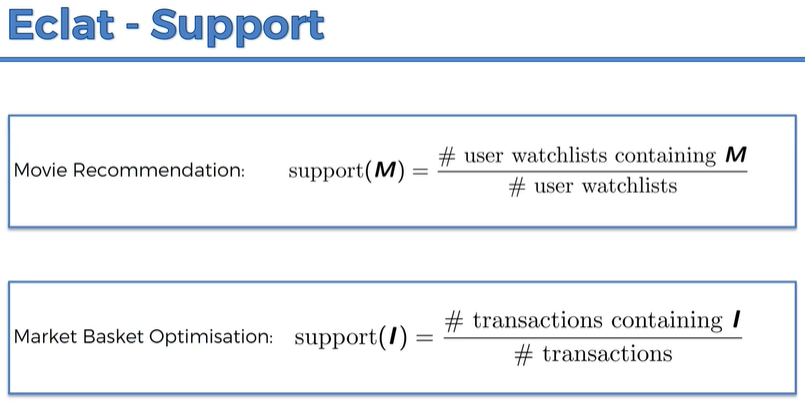

apyori is not present in google colab, so need to install it

In [ ]:
!pip install apyori

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Preprocessing

In [ ]:
# As names of columns (headers) are absent in dataset, headers = None
dataset = pd.read_csv("Market_Basket_Optimisation.csv", header = None)
transactions = []
for i in range(len(dataset)):
  transactions.append([str(dataset.values[i, j]) for j in range(0, 20)])
# print(transactions)

## Training the Eclat model on the dataset

In [ ]:
from apyori import apriori
# Returns rules
rules = apriori(transactions = transactions,  min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 4)
# min_support: Assuming 3 transactions / day or 21 / week => 21/7501 = 0.003
# min_confidence: Experimentally
# min_lift: 3, 4, 5 etc
# min_lenght, max_length: Business model
print(rules)

<generator object apriori at 0x7f3473f517d0>


## Visualising the results

### Displaying the first results coming directly from the output of the apriori function

In [ ]:
results = list(rules)

In [ ]:
results

### Putting the results well organised into a Pandas DataFrame

In [76]:
def inspect(results):
    p1 = [tuple(result[2][0][0])[0] for result in results] 
    p2 = [tuple(result[2][0][1])[0] for result in results] 
    supports = [result[1] for result in results] 
    return list(zip(p1, p2, supports))

resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Product 1', 'Product 2', 'Support']) 
resultsinDataFrame

,Product 1,Product 2,Support
0,light cream,chicken,0.004533
1,mushroom cream sauce,escalope,0.005733
2,pasta,escalope,0.005866
3,fromage blanc,honey,0.003333
4,herb & pepper,ground beef,0.015998
...,...,...,...
131,mineral water,olive oil,0.005199
132,whole wheat pasta,olive oil,0.003866
133,spaghetti,olive oil,0.005066
134,olive oil,spaghetti,0.004399


### **Takeaways**

Support gives us the ocuurence of A & B in the entire dataset


### Displaying the results sorted w.r.t Supports

In [77]:
print(resultsinDataFrame.nlargest(n = 10, columns = 'Support'))

             Product 1          Product 2   Support
4        herb & pepper        ground beef  0.015998
43       herb & pepper                nan  0.015998
30           spaghetti        ground beef  0.008666
95           spaghetti                nan  0.008666
7    whole wheat pasta          olive oil  0.007999
60   whole wheat pasta          olive oil  0.007999
34              shrimp  frozen vegetables  0.007199
55           spaghetti          olive oil  0.007199
102             shrimp  frozen vegetables  0.007199
128          spaghetti          olive oil  0.007199
